### Decision trees
* Extremely intuitive ways to classify or label objects
* Ask a series of questions to find the right classification
<img src="https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in67.png">

* Binary splitting makes this very efficient, each question is intended to split the tree into half.
* Trick is to identify the right question to ask
* axis-aligned splits in the data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

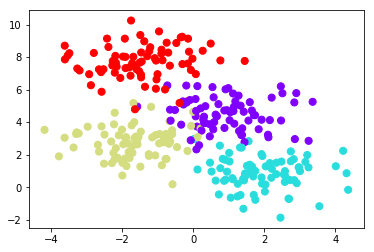

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X[:,0],X[:,1], c = y,s=50,cmap='rainbow')


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [8]:
X_test,y_test = make_blobs(n_samples=30000, centers=4, random_state=0, cluster_std=2.0)

In [9]:
y_pred = tree.predict(X_test)

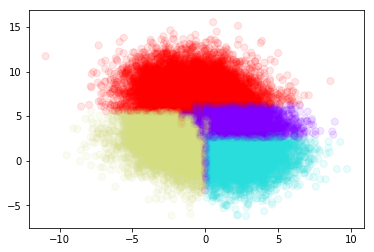

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X[:,0],X[:,1], c = y,s=50,cmap='rainbow')
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred,s=50,cmap='rainbow',alpha=0.1)

In [15]:
tree.tree_.max_depth

9

In [18]:
import sklearn.tree as sktree

In [20]:
sktree.export_graphviz(tree,out_file='tree.dot')
#Use this to see tree http://www.webgraphviz.com/

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

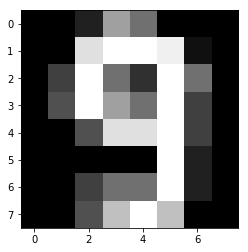

In [33]:
plt.imshow(digits.data[1795].reshape((8,8)),cmap='gray')

In [29]:
digits.data[2].reshape((8,8))

array([[  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.],
       [  0.,   0.,   3.,  16.,  15.,  14.,   0.,   0.],
       [  0.,   0.,   8.,  13.,   8.,  16.,   0.,   0.],
       [  0.,   0.,   1.,   6.,  15.,  11.,   0.,   0.],
       [  0.,   1.,   8.,  13.,  15.,   1.,   0.,   0.],
       [  0.,   9.,  16.,  16.,   5.,   0.,   0.,   0.],
       [  0.,   3.,  13.,  16.,  16.,  11.,   5.,   0.],
       [  0.,   0.,   0.,   3.,  11.,  16.,   9.,   0.]])

In [31]:
digits.data.shape

(1797, 64)

In [32]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data, digits.target, random_state=0)

In [37]:
rf_model = RandomForestClassifier(n_estimators=1000)

In [43]:
rf_model.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rf_model.predict(Xtest)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(ytest,y_pred)

0.97999999999999998